In [ ]:
##Some basic structure - Dummy

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have data for a single sample
time_steps = 10000  # Number of time steps per sample

# Example constant parameters (replace with actual constants)
m1 = 290
m2 = 60
k1 = 16200
k2 = 191000
c1 = 1000
c2 = 2500

# Generate synthetic data (for illustration purposes)
u_t = np.random.rand(time_steps)  # Example varying input u(t)

# Constants repeated for each time step
constants = np.array([m1, m2, k1, k2, c1, c2])
constants = np.tile(constants, (time_steps, 1))  # Repeat for each time step

# Example outputs x(t), v(t), a(t) (replace with actual data)
x_t = np.random.rand(time_steps)
v_t = np.random.rand(time_steps)
a_t = np.random.rand(time_steps)

# Combine inputs and constants into X
X = np.concatenate([u_t[:, np.newaxis], constants], axis=1)  # Shape: (time_steps, num_inputs)

# Normalize the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Combine outputs into Y
Y = np.stack([x_t, v_t, a_t], axis=1)  # Shape: (time_steps, num_outputs)

# Reshape data for LSTM input (samples, time_steps, features)
X_scaled = X_scaled[np.newaxis, :, :]  # Add batch dimension
Y = Y[np.newaxis, :, :]  # Add batch dimension


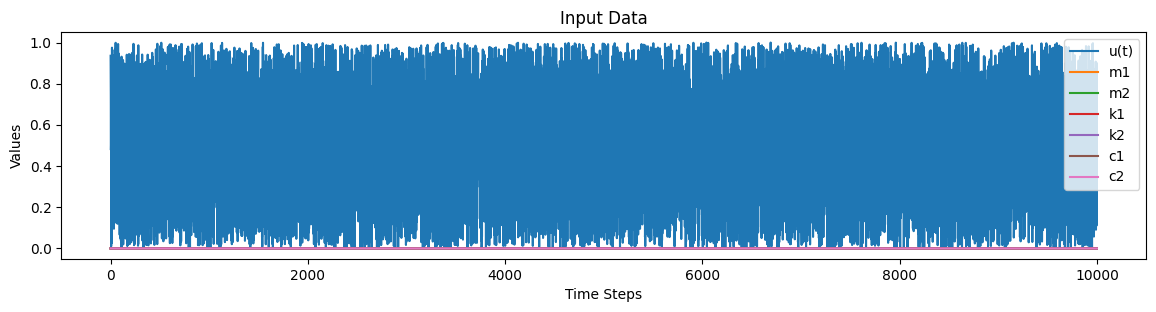

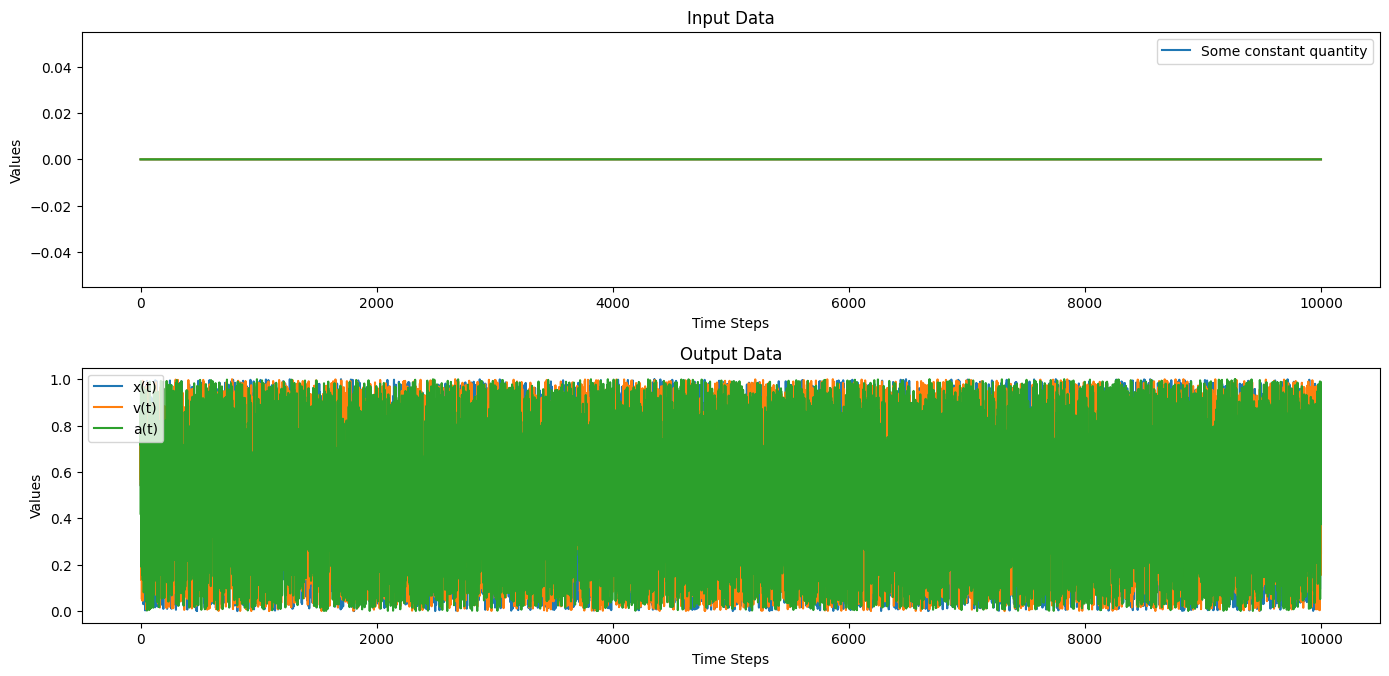

In [6]:
# Plotting input data (just an example, adjust based on your data structure)
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(X_scaled[0, :, :])  # Plotting the first sample of input data
plt.title('Input Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend(['u(t)','m1', 'm2', 'k1', 'k2', 'c1', 'c2'])

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(X_scaled[0, :, 1:4])  # Plotting the first sample of input data
plt.title('Input Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend(['Some constant quantity'])

# Plotting output data (just an example, adjust based on your data structure)
plt.subplot(3, 1, 3)
plt.plot(Y[0, :, :])  # Plotting the first sample of output data
plt.title('Output Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend(['x(t)', 'v(t)', 'a(t)'])

plt.tight_layout()
plt.show()

In [7]:
# Split data into training and testing sets
train_size = int(0.8 * time_steps)
x_train, x_test = X_scaled[:, :train_size, :], X_scaled[:, train_size:, :]
y_train, y_test = Y[:, :train_size, :], Y[:, train_size:, :]

In [8]:
X_scaled[0][0:2]

array([[0.9358348 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.84029352, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [10]:

# Design the RNN model
model = Sequential([
    LSTM(128, input_shape=(None, X_scaled.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    Dense(Y.shape[2])  # Number of outputs
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.3500
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2804
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2181
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1608
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1116
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0935
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1307
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1195
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0990
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0904
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0923
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0966
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1001
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1012
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1010
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step 

In [11]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


In [12]:
#Taking corresponding output variables from the test data
x_t = y_test[0,:,0]
v_t = y_test[0,:,1]
a_t = y_test[0,:,2]

In [13]:
#Taking corresponding output variables from the prediction
x_t_pred = y_pred[0,:,0]
v_t_pred = y_pred[0,:,1]
a_t_pred = y_pred[0,:,2]

In [14]:
print(y_test.shape)

(1, 2000, 3)


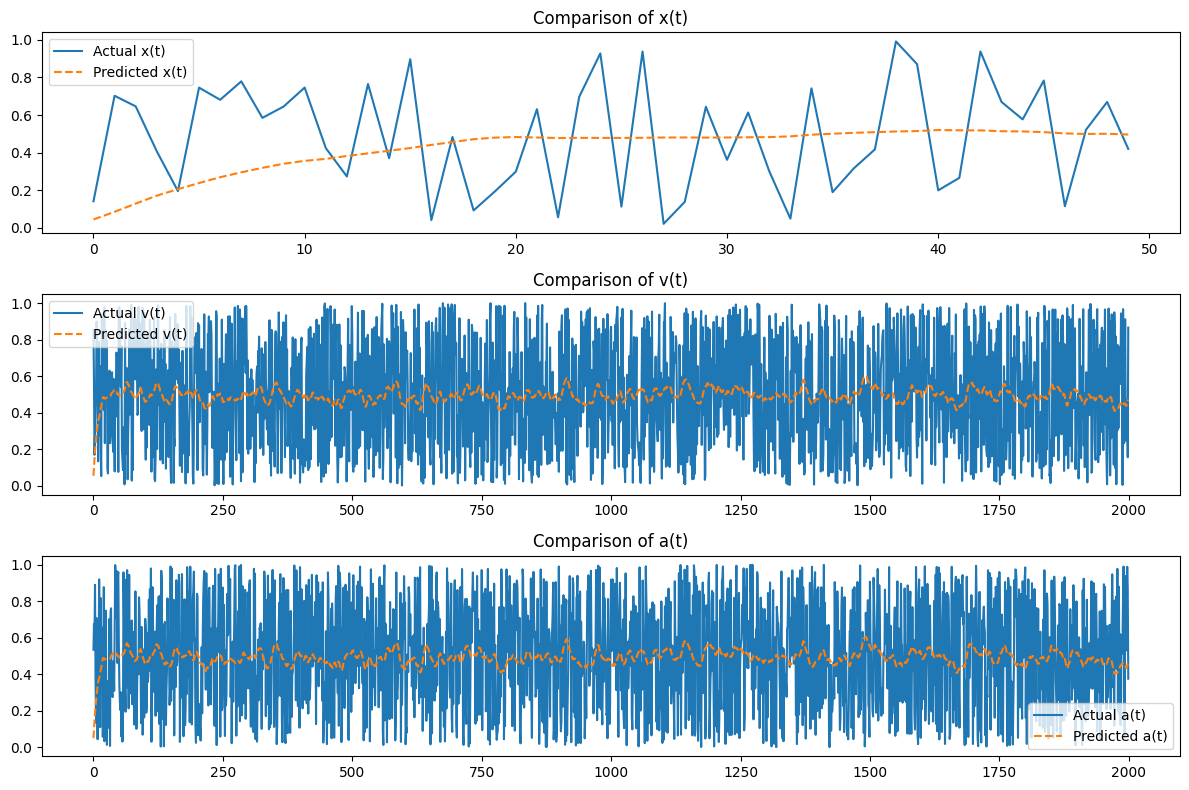

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_t[0:50], label='Actual x(t)')
plt.plot(x_t_pred[0:50], label='Predicted x(t)', linestyle='--')
plt.title('Comparison of x(t)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(v_t, label='Actual v(t)')
plt.plot(v_t_pred, label='Predicted v(t)', linestyle='--')
plt.title('Comparison of v(t)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(a_t, label='Actual a(t)')
plt.plot(a_t_pred, label='Predicted a(t)', linestyle='--')
plt.title('Comparison of a(t)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
##START OF LATEST CODE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


def generate_dataset(n, k, t0, T, initial_conditions):
    results = []

    for _ in range(n):
        m1 = np.random.uniform(210.375, 440, 1)[0]
        m2 = np.random.uniform(29.7, 75, 1)[0]
        k1 = np.random.uniform(20000, 40000, 1)[0]
        k2 = np.random.uniform(150000, 350000, 1)[0]
        c1 = np.random.uniform(0.3, 0.8, 1)[0] * 2 * np.sqrt(m1 * k1)
        c2 = np.random.uniform(0.01, 0.1, 1)[0] * 2 * np.sqrt(m2 * k2)
        
        m = 5
        t = np.linspace(t0, T, k)
        A = np.random.uniform(0.01, 0.02, 2 * m)
        omega1 = 2 * np.pi * np.random.uniform(5, 25, m) / np.random.uniform(10, 15, m)
        omega2 = 2 * np.pi * np.random.uniform(5, 25, m) / np.random.uniform(1000, 1500, m)
        omega = np.concatenate((omega1, omega2))
        phi = np.random.uniform(0, 2 * np.pi, 2 * m)
        u_x = [A[i] * np.sin((i+1) * omega[i] * t + phi[i]) for i in range(2 * m)]
        u = sum(u_x)

        def u_func(t):
            return sum(A[i] * np.sin((i+1) * omega[i] * t + phi[i]) for i in range(2 * m))

        def system(t, y):
            x1, x1_prime, x2, x2_prime = y
            x1_double_prime = (-c1 * (x1_prime - x2_prime) - k1 * (x1 - x2)) / m1
            x2_double_prime = (-c1 * (x2_prime - x1_prime) - c2 * (x2_prime - A[1] * omega[1] * np.cos(omega[1] * t)) 
                               - k1 * (x2 - x1) - k2 * (x2 - u_func(t))) / m2
            return [x1_prime, x1_double_prime, x2_prime, x2_double_prime]

        t_span = (t0, T)
        t_vals = np.linspace(t0, T, k)

        sol = solve_ivp(system, t_span, initial_conditions, t_eval=t_vals)

        x1_vals = sol.y[0]
        x2_vals = sol.y[2]
        x1_prime_vals = sol.y[1]
        x2_prime_vals = sol.y[3]
        x1_double_prime_vals = np.gradient(sol.y[1], t_vals)
        x2_double_prime_vals = np.gradient(sol.y[3], t_vals)

        dataset = {
            "m1": m1,
            "m2": m2,
            "k1": k1,
            "k2": k2,
            "c1": c1,
            "c2": c2,
            "time": t_vals,
            "u(t)": u,
            "x1": x1_vals,
            "x2": x2_vals,
            "x1_prime": x1_prime_vals,
            "x2_prime": x2_prime_vals,
            "x1_double_prime": x1_double_prime_vals,
            "x2_double_prime": x2_double_prime_vals
        }

        results.append(dataset)

    return results

In [11]:
# Parameters for dataset generation
n = 1  # Number of datasets to generate
k = 20000  # Number of time steps
t0 = 0  # Initial time
T = 5  # Final time
initial_conditions = [0, 0, 0, 0]  # Initial conditions

results = generate_dataset(n, k, t0, T, initial_conditions)

# Extract data from the generated dataset for RNN input
dataset = results[0]  # Taking the first dataset as an example
t_vals = dataset["time"]
u_vals = dataset["u(t)"]
x1_vals = dataset["x1"]
x2_vals = dataset["x2"]
x1_prime_vals = dataset["x1_prime"]
x2_prime_vals = dataset["x2_prime"]
x1_double_prime_vals = dataset["x1_double_prime"]
x2_double_prime_vals = dataset["x2_double_prime"]

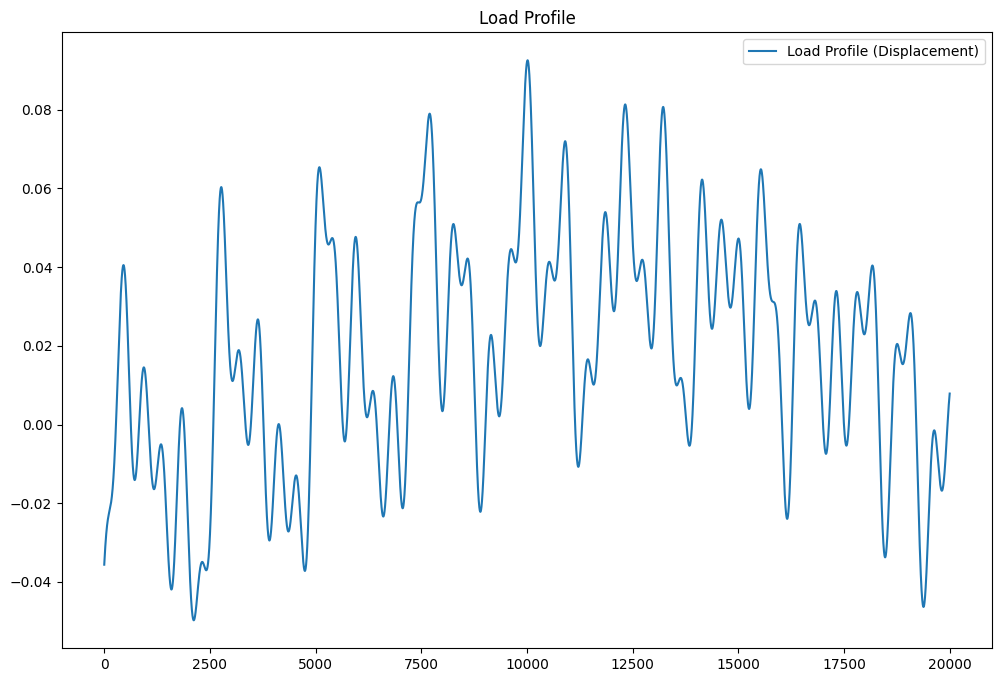

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 1, 1)
plt.plot(u_vals, label='Load Profile (Displacement)')
plt.title('Load Profile')
plt.legend()

In [17]:
# Define the parameters
params = np.array([dataset["m1"], dataset["m2"], dataset["k1"], dataset["k2"], dataset["c1"], dataset["c2"]])
params = params.reshape(1, -1)  # Reshape to 2D array for scaling

# Scale the parameters
scaler_params = MinMaxScaler()
params_scaled = scaler_params.fit_transform(params).flatten()

# Time-varying input remains unscaled
u_vals = np.array(u_vals)

# Outputs remain unscaled
outputs = np.column_stack((
    x1_vals, x2_vals, x1_prime_vals, x2_prime_vals, x1_double_prime_vals, x2_double_prime_vals
))

# Create sequences for RNN
sequence_length = 50  # Length of the input sequences
X = []
y = []

for i in range(len(u_vals) - sequence_length):
    seq_u = u_vals[i:i + sequence_length]
    seq_params = np.tile(params_scaled, (sequence_length, 1))
    seq_combined = np.hstack((seq_params, seq_u.reshape(-1, 1)))
    X.append(seq_combined)
    y.append(outputs[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [21]:
y_train[0][0:4]

array([-7.99558788e-04, -1.42519721e-02, -1.57853528e-01, -1.44215005e+00])

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 248.6579 - val_loss: 240.8300
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 242.4330 - val_loss: 241.1595
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 245.7708 - val_loss: 240.4594
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 247.2726 - val_loss: 241.4567
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 246.1028 - val_loss: 241.3435
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 245.0624 - val_loss: 240.7328
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 245.8368 - val_loss: 241.4558
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 247.8012 - val_loss: 241.3167
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 247.4614 - val_loss: 241.5014
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 242.2440 - val_loss: 241.5004
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 246.7236 - val_loss:

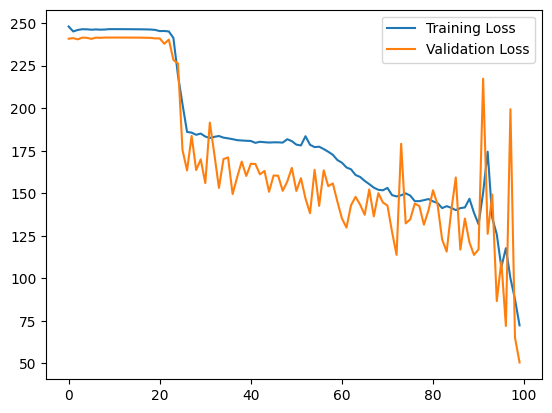

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.8893
Test Loss: 34.569419860839844


In [25]:
# Define the RNN model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dense(6)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

In [28]:
y_pred = model.predict(X_test)



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


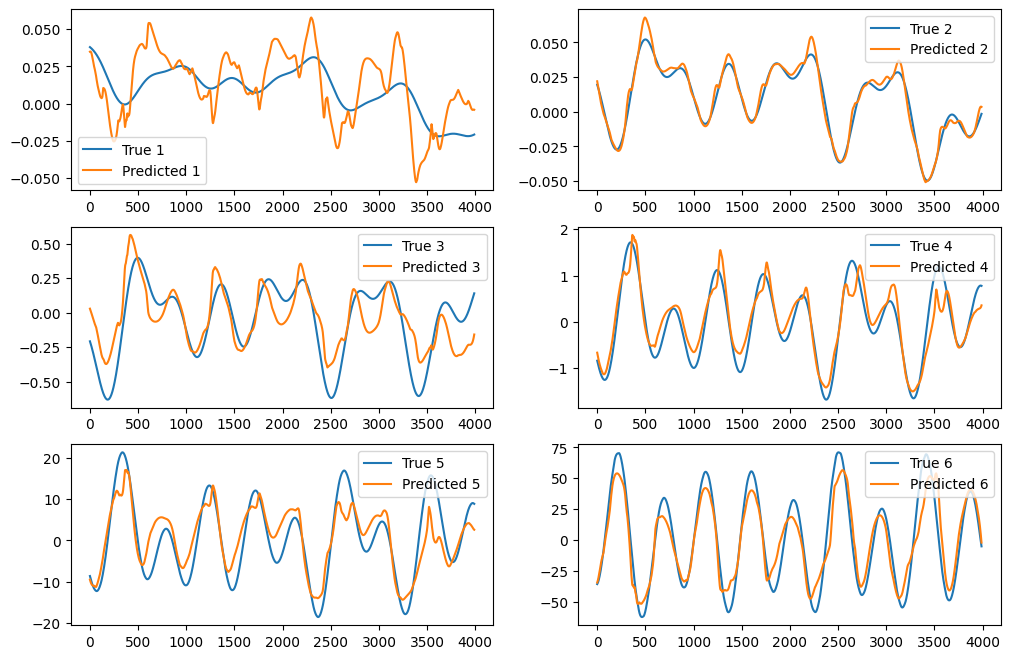

In [30]:
# Plot true vs. predicted values for a subset of the test set
plt.figure(figsize=(12, 8))
for i in range(6):  # Assuming there are 6 outputs
    plt.subplot(3, 2, i + 1)
    plt.plot(y_test[:, i], label=f'True {i+1}')
    plt.plot(y_pred[:, i], label=f'Predicted {i+1}')
    plt.legend()
plt.show()

In [ ]:
##END OF LATEST CODE

In [ ]:
#Code below is from SATHYAN

In [3]:

# Reshape data for LSTM input (samples, time_steps, features)
X_scaled = np.array([u_vals, x1_vals, x2_vals, x1_prime_vals, x2_prime_vals, x1_double_prime_vals, x2_double_prime_vals]).T  # Shape: (k, 7)

# Assuming x1 and x2 are the outputs of interest
Y = np.array([dataset["x1"], dataset["x2"]]).T  # Shape: (k, 2)

# Reshape X_scaled for LSTM input (samples, time_steps, features)
X_scaled = X_scaled[np.newaxis, :, :]  # Shape: (1, k, 7)

# Reshape Y for LSTM input (samples, time_steps, features)
Y = Y[np.newaxis, :, :]  # Shape: (1, k, 2)

# Split data into training and testing sets
train_size = int(0.8 * k)
x_train, x_test = X_scaled[:, :train_size, :], X_scaled[:, train_size:, :]
y_train, y_test = Y[:, :train_size, :], Y[:, train_size:, :]

Epoch 1/150


C:\Users\sathy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.0872
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0995
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0514
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0199
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0255
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0309
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0247
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0153
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0107
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0111
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0124
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0119
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0097
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0073
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0058
Epoch 16/150
1/1 ━━━━━━━━━━━━━━

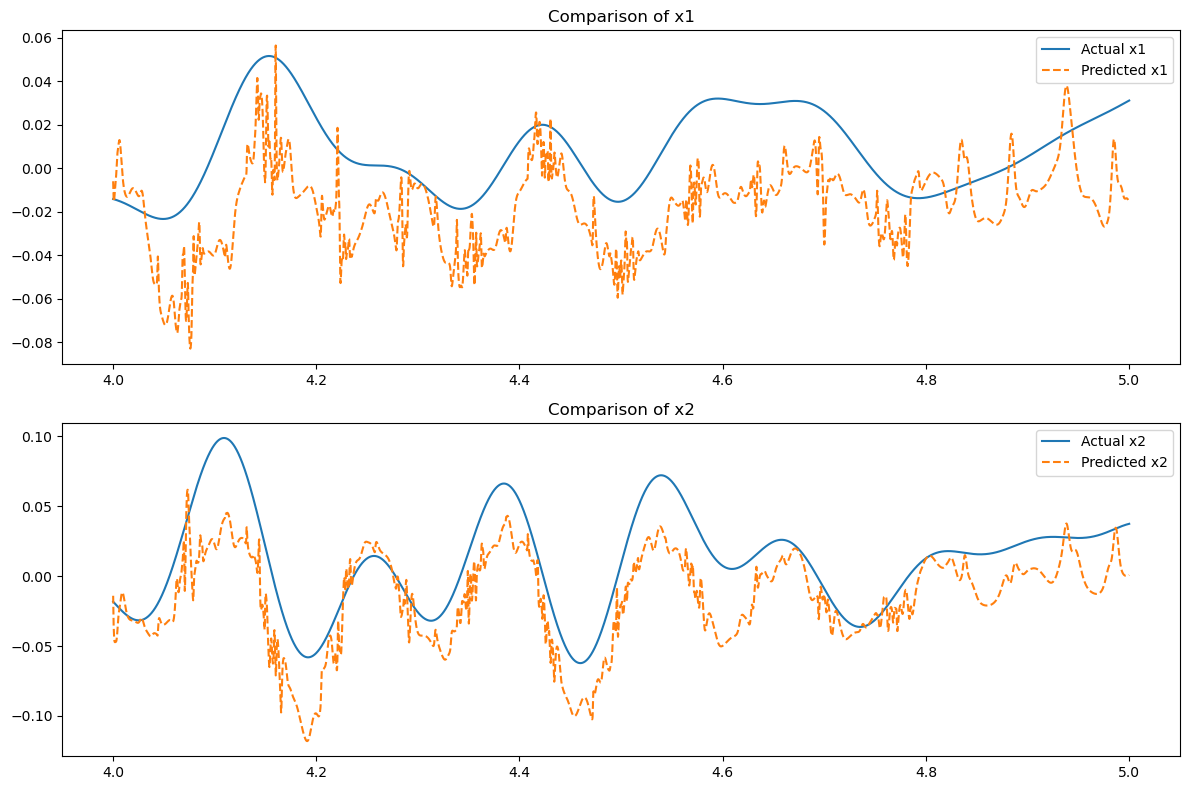

In [8]:


# Design the RNN model
model = Sequential([
    LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    LSTM(128, return_sequences=True),
    Dense(2)  # Number of outputs (x1 and x2)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=16)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(x_test)

# Plotting results (example for x1 and x2)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_vals[train_size:], y_test[0, :, 0], label='Actual x1')
plt.plot(t_vals[train_size:], y_pred[0, :, 0], label='Predicted x1', linestyle='--')
plt.title('Comparison of x1')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_vals[train_size:], y_test[0, :, 1], label='Actual x2')
plt.plot(t_vals[train_size:], y_pred[0, :, 1], label='Predicted x2', linestyle='--')
plt.title('Comparison of x2')
plt.legend()

plt.tight_layout()
plt.show()